# 합성곱신경망 - Convolutional Neural Network
- 합성곱레이어(Conv2D) - 풀링레이어(MaxPooling2D) - Flatten - Full Connect  

In [1]:
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout, Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D,ZeroPadding2D, Flatten, Input
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets.mnist import load_data
from sklearn.datasets                import load_digits

In [44]:
# 데이터 불러오기
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

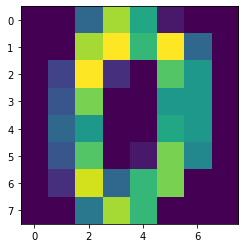

target :  0


In [45]:
plt.figure()
plt.imshow(data.images[0])
plt.show()
print('target : ', data.target[0])

In [46]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [47]:
X_data = data.images
y_data = data.target

X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [48]:
X_data.shape[0],X_data.shape[1],X_data.shape[2]

(1797, 8, 8)

In [49]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], X_data.shape[2],1)
X_data.shape

(1797, 8, 8, 1)

마지막 1은 흑백이라는 의미! 3일때는 컬러라는 의미


In [50]:
# 원-핫 인코딩
y_data = to_categorical(y_data)
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state = 111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [52]:
# 모델 생성
model = Sequential()

In [53]:
# cnn은 입력층 대신에 합성곱레이어가 필요! 
# cnn이라 활성함수는 relu
# padding='same' : 패딩을 하겠다는 의미
# padding='valid' : 패딩을 안하겠다는 의미
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2],X_data.shape[3]), kernel_size = (3,3), strides = (1,1),filters = 10, padding = 'valid', activation = 'relu'))
print('shape : ', model.output_shape)

shape :  (None, 6, 6, 10)


In [54]:
# 풀링레이어 만들기
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
print('shape : ', model.output_shape)

shape :  (None, 3, 3, 10)


In [55]:
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 6, 6, 10)          100       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
_________________________________________________________________


In [57]:
# 컴파일하기
model.compile(optimizer = Adam(learning_rate=0.01),
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])

In [58]:
# 학습시키기
model_history = model.fit(X_train, y_train, batch_size=50, validation_split=0.3, epochs=100, verbose=1)

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 1.9616 - accuracy: 0.4925 - val_loss: 0.6828 - val_accuracy: 0.8449
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4288 - accuracy: 0.8726 - val_loss: 0.3494 - val_accuracy: 0.8819
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2103 - accuracy: 0.9204 - val_loss: 0.2246 - val_accuracy: 0.9144
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9731 - val_loss: 0.1540 - val_accuracy: 0.9468
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9662 - val_loss: 0.1663 - val_accuracy: 0.9491
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.2112 - val_accuracy: 0.9329
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9831 - val_loss: 0.1716 - val_accuracy: 0.9514
Epoch 8/100


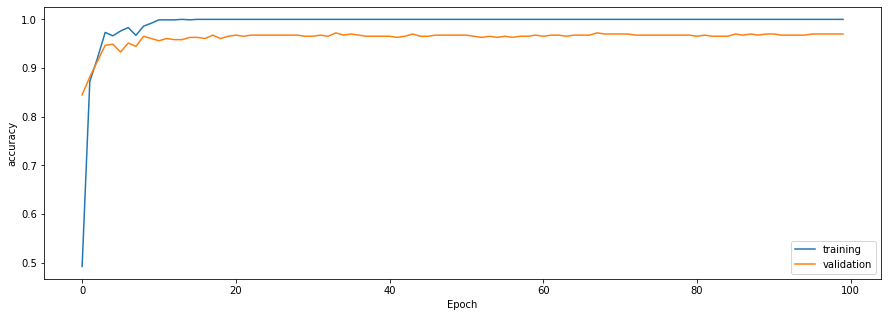

In [59]:
# 모델 성능 시각화
plt. figure(figsize = (15,5))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()
plt.close()

In [60]:
model_eval = model.evaluate(X_test,y_test)
print(model_eval[1])

12/12 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.9472
0.9472222328186035


Deep CNN

In [61]:
def digit_deep_cnn():
  model = Sequential() # 모델생성
  
  model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2],X_data.shape[3]), kernel_size = (3,3), strides = (1,1),filters = 10, padding = 'same', activation = 'relu'))# 합성곱 입력층 생성
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))

  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same')) # pooling
  
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))

  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same')) # pooling

  model.add(Flatten())
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))

  model.compile(optimizer = Adam(learning_rate=0.01),
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])
  return model

In [62]:
model =digit_deep_cnn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 50)          4550      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 50)          22550     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 50)         

In [63]:
# 학습시키기
model_history = model.fit(X_train, y_train, batch_size=50, validation_split=0.3, epochs=100, verbose=1)

Epoch 1/100
21/21 [==============================] - 2s 59ms/step - loss: 2.3512 - accuracy: 0.1234 - val_loss: 2.1493 - val_accuracy: 0.1991
Epoch 2/100
21/21 [==============================] - 1s 49ms/step - loss: 1.5366 - accuracy: 0.4338 - val_loss: 0.9204 - val_accuracy: 0.6968
Epoch 3/100
21/21 [==============================] - 1s 48ms/step - loss: 0.6160 - accuracy: 0.7990 - val_loss: 0.3997 - val_accuracy: 0.8704
Epoch 4/100
21/21 [==============================] - 1s 47ms/step - loss: 0.2513 - accuracy: 0.9164 - val_loss: 0.2836 - val_accuracy: 0.9236
Epoch 5/100
21/21 [==============================] - 1s 48ms/step - loss: 0.2679 - accuracy: 0.9214 - val_loss: 0.5161 - val_accuracy: 0.8657
Epoch 6/100
21/21 [==============================] - 1s 48ms/step - loss: 0.2154 - accuracy: 0.9284 - val_loss: 0.2117 - val_accuracy: 0.9398
Epoch 7/100
21/21 [==============================] - 1s 49ms/step - loss: 0.1344 - accuracy: 0.9572 - val_loss: 0.1861 - val_accuracy: 0.9352
Epoch 

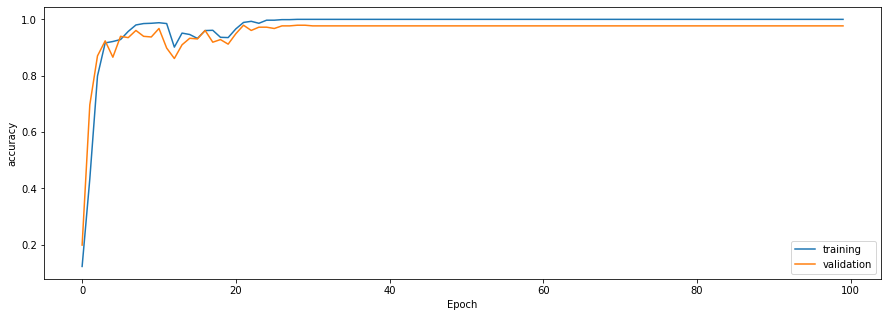

In [64]:
# 모델 성능 시각화
plt. figure(figsize = (15,5))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()
plt.close()

In [65]:
model_eval = model.evaluate(X_test,y_test)
print(model_eval[1])

12/12 [==============================] - 0s 10ms/step - loss: 0.1637 - accuracy: 0.9806
0.980555534362793


In [66]:
def digit_improve_deep_cnn():
  model = Sequential() # 모델생성
  
  model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2],X_data.shape[3]), kernel_size = (3,3), strides = (1,1),filters = 10, padding = 'same'))# 합성곱 입력층 생성
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  

  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same')) # pooling
  
  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(kernel_size = (3,3), strides = (1,1),filters = 50, padding = 'same', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2), padding = 'same')) # pooling

  model.add(Flatten())
  model.add(Dense(50, activation = 'relu' , kernel_initializer='he_normal'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

  model.compile(optimizer = Adam(learning_rate=0.01),
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])
  return model

In [67]:
model = digit_improve_deep_cnn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 8, 8, 10)          100       
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 10)          40        
_________________________________________________________________
activation_4 (Activation)    (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 50)          4550      
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_5 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 50)         

In [68]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=10)]
model_history = model.fit(X_train, y_train, batch_size=50, validation_split=0.3, epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
21/21 [==============================] - 1s 35ms/step - loss: 2.2915 - accuracy: 0.2617 - val_loss: 3.2104 - val_accuracy: 0.1042
Epoch 2/100
21/21 [==============================] - 1s 24ms/step - loss: 1.5995 - accuracy: 0.4289 - val_loss: 2.5595 - val_accuracy: 0.2315
Epoch 3/100
21/21 [==============================] - 1s 24ms/step - loss: 1.2377 - accuracy: 0.5512 - val_loss: 1.4723 - val_accuracy: 0.4144
Epoch 4/100
21/21 [==============================] - 1s 25ms/step - loss: 1.0120 - accuracy: 0.6159 - val_loss: 0.9471 - val_accuracy: 0.7222
Epoch 5/100
21/21 [==============================] - 1s 25ms/step - loss: 0.7816 - accuracy: 0.6975 - val_loss: 0.5686 - val_accuracy: 0.8912
Epoch 6/100
21/21 [==============================] - 1s 25ms/step - loss: 0.7316 - accuracy: 0.7005 - val_loss: 0.5612 - val_accuracy: 0.8356
Epoch 7/100
21/21 [==============================] - 1s 24ms/step - loss: 0.6550 - accuracy: 0.7403 - val_loss: 0.3745 - val_accuracy: 0.9005
Epoch 

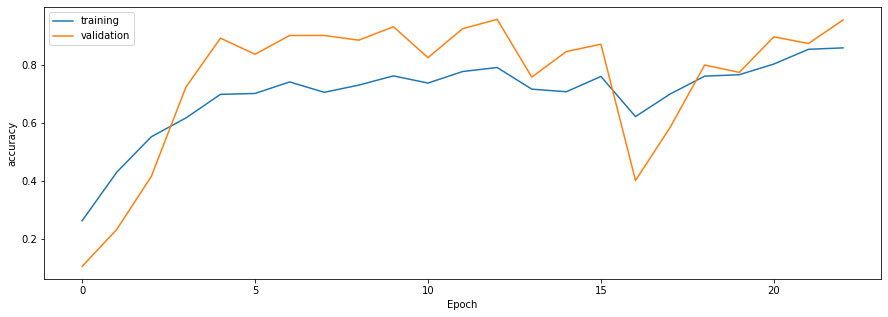

In [69]:
# 모델 성능 시각화
plt. figure(figsize = (15,5))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()
plt.close()

In [70]:
model_eval = model.evaluate(X_test,y_test)
print(model_eval[1])

12/12 [==============================] - 0s 5ms/step - loss: 0.1787 - accuracy: 0.9611
0.9611111283302307
